In [25]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Reading the sales_data csv file, loading the dataset.
df = pd.read_excel("C:/Ai/Group Project Data-SFD Data-Toronto Police (1).xlsx")
df2 = df[['OCC_DOY', 'OCC_YEAR', 'OCC_MONTH', 'DEATH', 'INJURIES','HOOD_158', 'NEIGHBOURHOOD_158']]

#把数据中的no specific area 清掉了
df2.loc[:,'HOOD_158'] = df2['HOOD_158'].replace('NSA', np.nan)
df2.loc[:,'NEIGHBOURHOOD_158'] = df2['NEIGHBOURHOOD_158'].replace('NSA', np.nan)
df2=df2.dropna(subset=['HOOD_158','NEIGHBOURHOOD_158'])
df2.info()
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5706
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OCC_DOY            5643 non-null   int64 
 1   OCC_YEAR           5643 non-null   int64 
 2   OCC_MONTH          5643 non-null   object
 3   DEATH              5643 non-null   int64 
 4   INJURIES           5643 non-null   int64 
 5   HOOD_158           5643 non-null   object
 6   NEIGHBOURHOOD_158  5643 non-null   object
dtypes: int64(4), object(3)
memory usage: 352.7+ KB
OCC_DOY              0
OCC_YEAR             0
OCC_MONTH            0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
dtype: int64


In [28]:
df2.groupby(['OCC_YEAR']).size().reset_index(name = 'counts')




,OCC_YEAR,counts
0,2004,183
1,2005,251
2,2006,208
3,2007,202
4,2008,235
5,2009,247
6,2010,251
7,2011,223
8,2012,215
9,2013,195


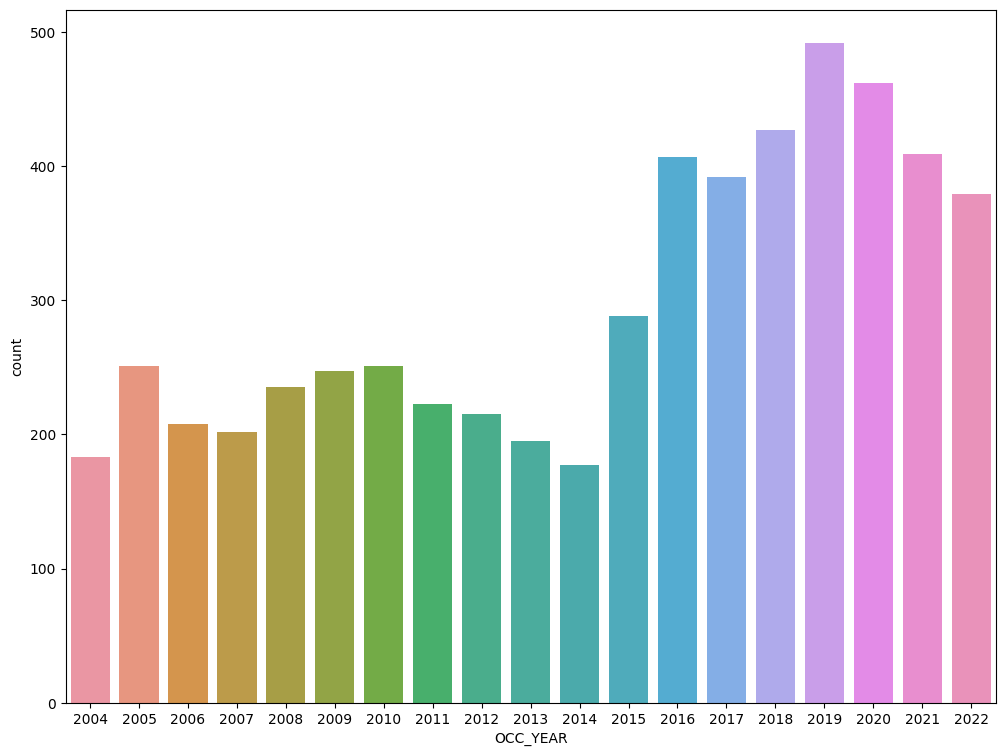

In [5]:
fig= plt.subplots(figsize=(12,9))
sns.countplot(
    x = 'OCC_YEAR',
    data=df2
)
#plt.xticks(range(2004,2023,1))
plt.show()

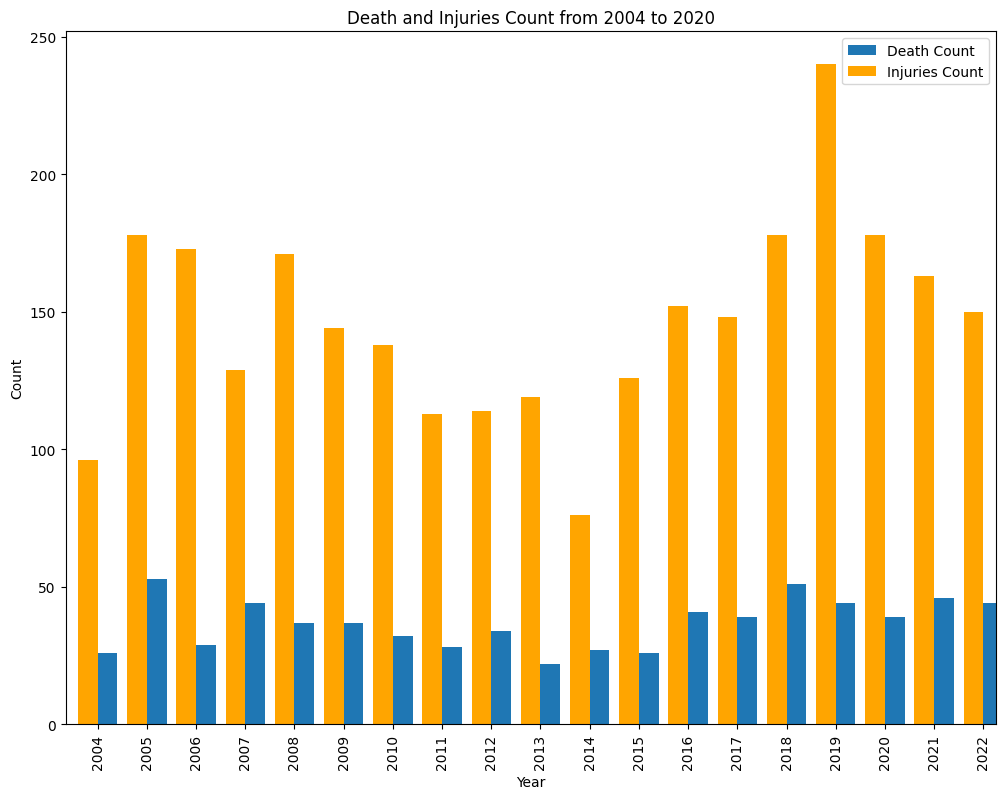

In [7]:
death_count = df.groupby('OCC_YEAR')['DEATH'].sum().head(20)
#print(death_count)
injuries_count = df.groupby('OCC_YEAR')['INJURIES'].sum().head(20)
#print(injuries_count)
fig, ax = plt.subplots(figsize=(12, 9))

death_count = death_count.plot(kind='bar', ax=ax, width=0.4, position=0, label='Death Count')

injuries_coun = injuries_count.plot(kind='bar', ax=ax, width = 0.4, position=1, color='orange', label='Injuries Count')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Death and Injuries Count from 2004 to 2020')

ax.legend()